<a href="https://colab.research.google.com/github/Thivakaran12/Spam-mail-classification/blob/main/ML_CW_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spam Mail Classification Using Decision Tree**

In [105]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Importing the dataset
column_names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_%3B','char_freq_%28','char_freq_%5B','char_freq_%21','char_freq_%24','char_freq_%23','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']
dataset = pd.read_csv('/content/spambase.data', delimiter =',', header=None, names=column_names)

Understanding the data

In [107]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [108]:
dataset.shape

(4601, 58)

In [109]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [110]:
dataset.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [111]:
#seperating the spam mails and non-spam mails
dataset['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

In [112]:
dataset.nunique() #outputs the unique values

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

Relationship Anaysis

In [113]:
corelation = dataset.corr()

<Axes: >

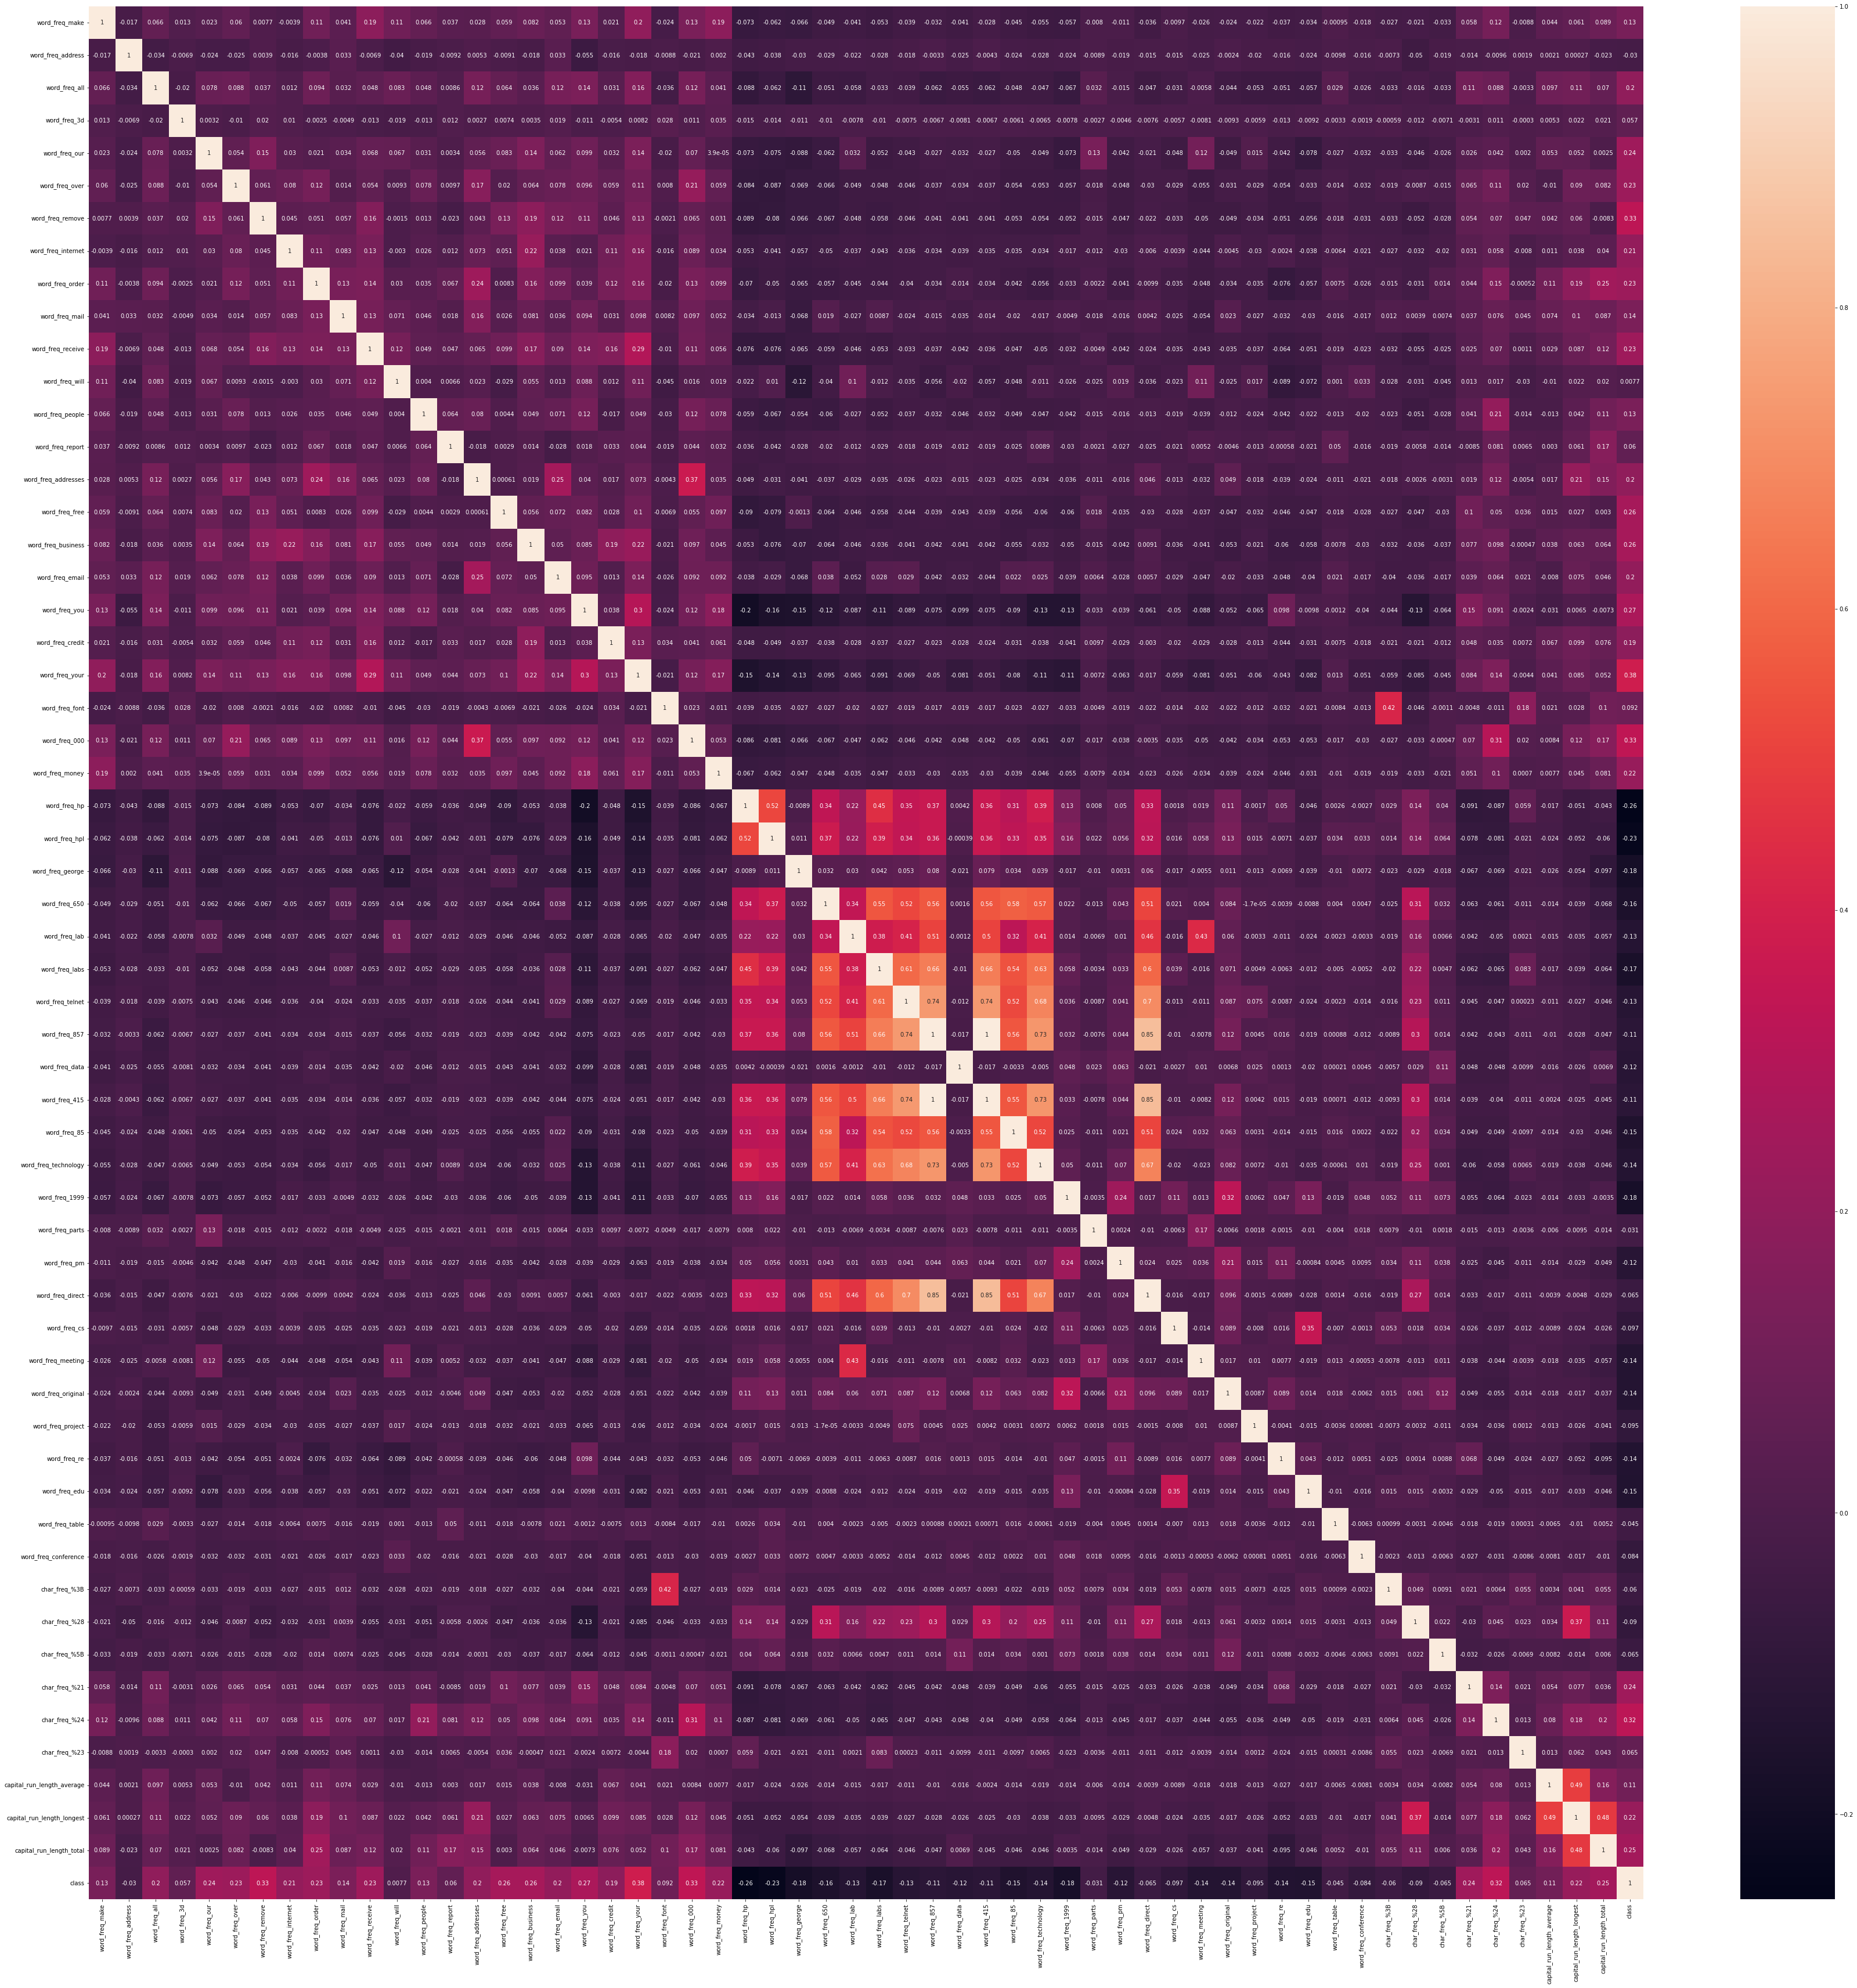

In [114]:
plt.figure(figsize=(60,60))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

Cleaning the data

In [115]:
#data cleaning
dataset.dropna(inplace=True)
dataset.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [116]:
duplicates = dataset.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  391


In [117]:
#droping all duplicates
dataset.drop_duplicates(inplace=True)
dataset.shape

(4210, 58)

Data Preprocessing

In [118]:
#Split the dataset into feature set and target variable
X = dataset.drop('class', axis = 'columns')
y = dataset['class'].values

In [119]:
y_df = pd.DataFrame(data=y, columns=['class'])

In [120]:
print(X.shape)
print(y_df.shape)

(4210, 57)
(4210, 1)


Standardize the features

In [121]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

In [122]:
scaled_data = pd.DataFrame( data = X_scaled , columns =X.columns)

In [123]:
scaled_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4210.000000,4.210000e+03,...,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03
mean,4.725700e-17,1.350200e-17,2.700400e-17,0.000000,4.050600e-17,-1.350200e-17,0.000000,-1.350200e-17,0.000000,-8.776300e-17,...,-2.700400e-17,0.000000,-6.751000e-18,1.350200e-17,-2.700400e-17,-2.700400e-17,2.700400e-17,-1.350200e-17,-1.350200e-17,-2.700400e-17
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119,1.000119e+00,...,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-1.164071e-01,-0.160010,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-0.046644,1.231299e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-8.897950e-02,...,-1.164071e-01,-0.160010,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02
max,1.478696e+01,3.119145e+01,9.325045e+00,31.609920,1.406769e+01,2.095434e+01,18.005710,2.681886e+01,18.319574,2.731139e+01,...,3.338604e+01,17.206130,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01


Applying PCA for scaled data

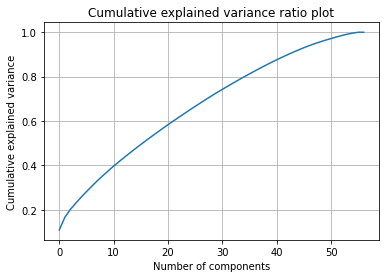

In [124]:
from sklearn.decomposition import PCA

pca = PCA().fit(scaled_data)
explained_var = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_var))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance ratio plot')
plt.grid() 
plt.show()

Based on the above diagram, it can be seen that first 47 components explain around 95% variance in the data.
Therefore, instead of selecting all, we will select the first 47 principal components for modeling and we would obtain similar result

In [125]:
# Perform PCA on the feature set
pca = PCA(n_components = 47)
X_pca = pca.fit_transform(X_scaled)

In [126]:
print(X_scaled.shape)
print(X_pca.shape)

(4210, 57)
(4210, 47)


Creating a DataFrame for the principal components

In [127]:
#This will be the new data fed to the algorithm.
principal_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                                                 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                                                 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25',
                                                 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 
                                                 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45',
                                                 'PC46', 'PC47'])

principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
0,-0.766904,0.049604,-0.643948,0.037461,-0.254251,-0.329357,-0.084827,0.350291,1.751105,0.181566,...,0.128753,0.254872,0.067242,0.216556,0.211938,-0.397658,0.238170,-0.126327,0.251639,-0.150083
1,-1.293574,2.007026,0.071454,-0.481329,-0.099276,-1.117648,-0.545094,0.250669,-0.309511,-0.630490,...,-0.184601,0.129191,0.074827,0.246687,0.542422,0.016519,0.314215,0.071174,-0.369004,0.148203
2,-1.612745,4.821304,3.137290,-1.073421,1.591692,-1.499992,-3.174112,-1.398560,1.032022,2.520505,...,-0.284726,-0.307728,0.943481,0.854094,0.547572,0.310705,-0.753787,0.570138,-0.255029,0.700944
3,-0.857216,0.414170,-0.551309,-0.031398,-0.049909,0.703187,0.339613,-0.445369,-0.366285,0.183459,...,0.260845,-0.308095,0.479839,0.798717,-0.630965,0.341559,-0.307732,-0.459032,0.446819,-0.228261
4,-0.858070,0.413502,-0.553433,-0.031657,-0.049939,0.703803,0.337867,-0.446651,-0.366624,0.183055,...,0.261333,-0.308105,0.480281,0.797924,-0.629570,0.341426,-0.306734,-0.458757,0.447554,-0.227080


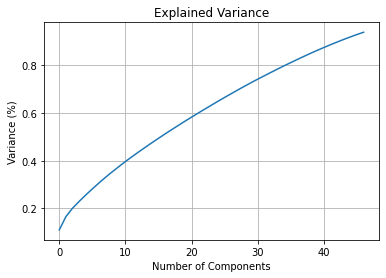

In [128]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.grid() 
plt.show()

Visualizing the first 2 principal components using scatter plot

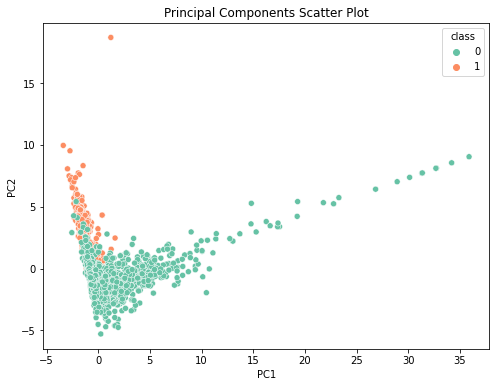

In [129]:
final_df = pd.concat([principal_df, y_df], axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='class', palette='Set2')
plt.title('Principal Components Scatter Plot')
plt.show()

Model Building

Finding the optimal value for maximum depth of the tree.

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Define the parameter grid
param_grid = {'max_depth': [1, 2, 3, 4, 5, 7, 9]}

#Create a decision tree classifier and perform grid search
d_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(d_tree, param_grid, cv=5)

#Fit the GridSearchCV object to the data
grid_search.fit(X_pca, y_df)
print(grid_search.best_params_)
print(grid_search.best_score_)



{'max_depth': 4}
0.8836104513064132


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#function to perform training with entropy
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth = 7, min_samples_leaf=5)

In [132]:
#split dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_df, random_state=0, test_size=0.2)

In [133]:
# Fit the Model
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=100)

In [134]:
#Predict the test set results
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

Model Visualization

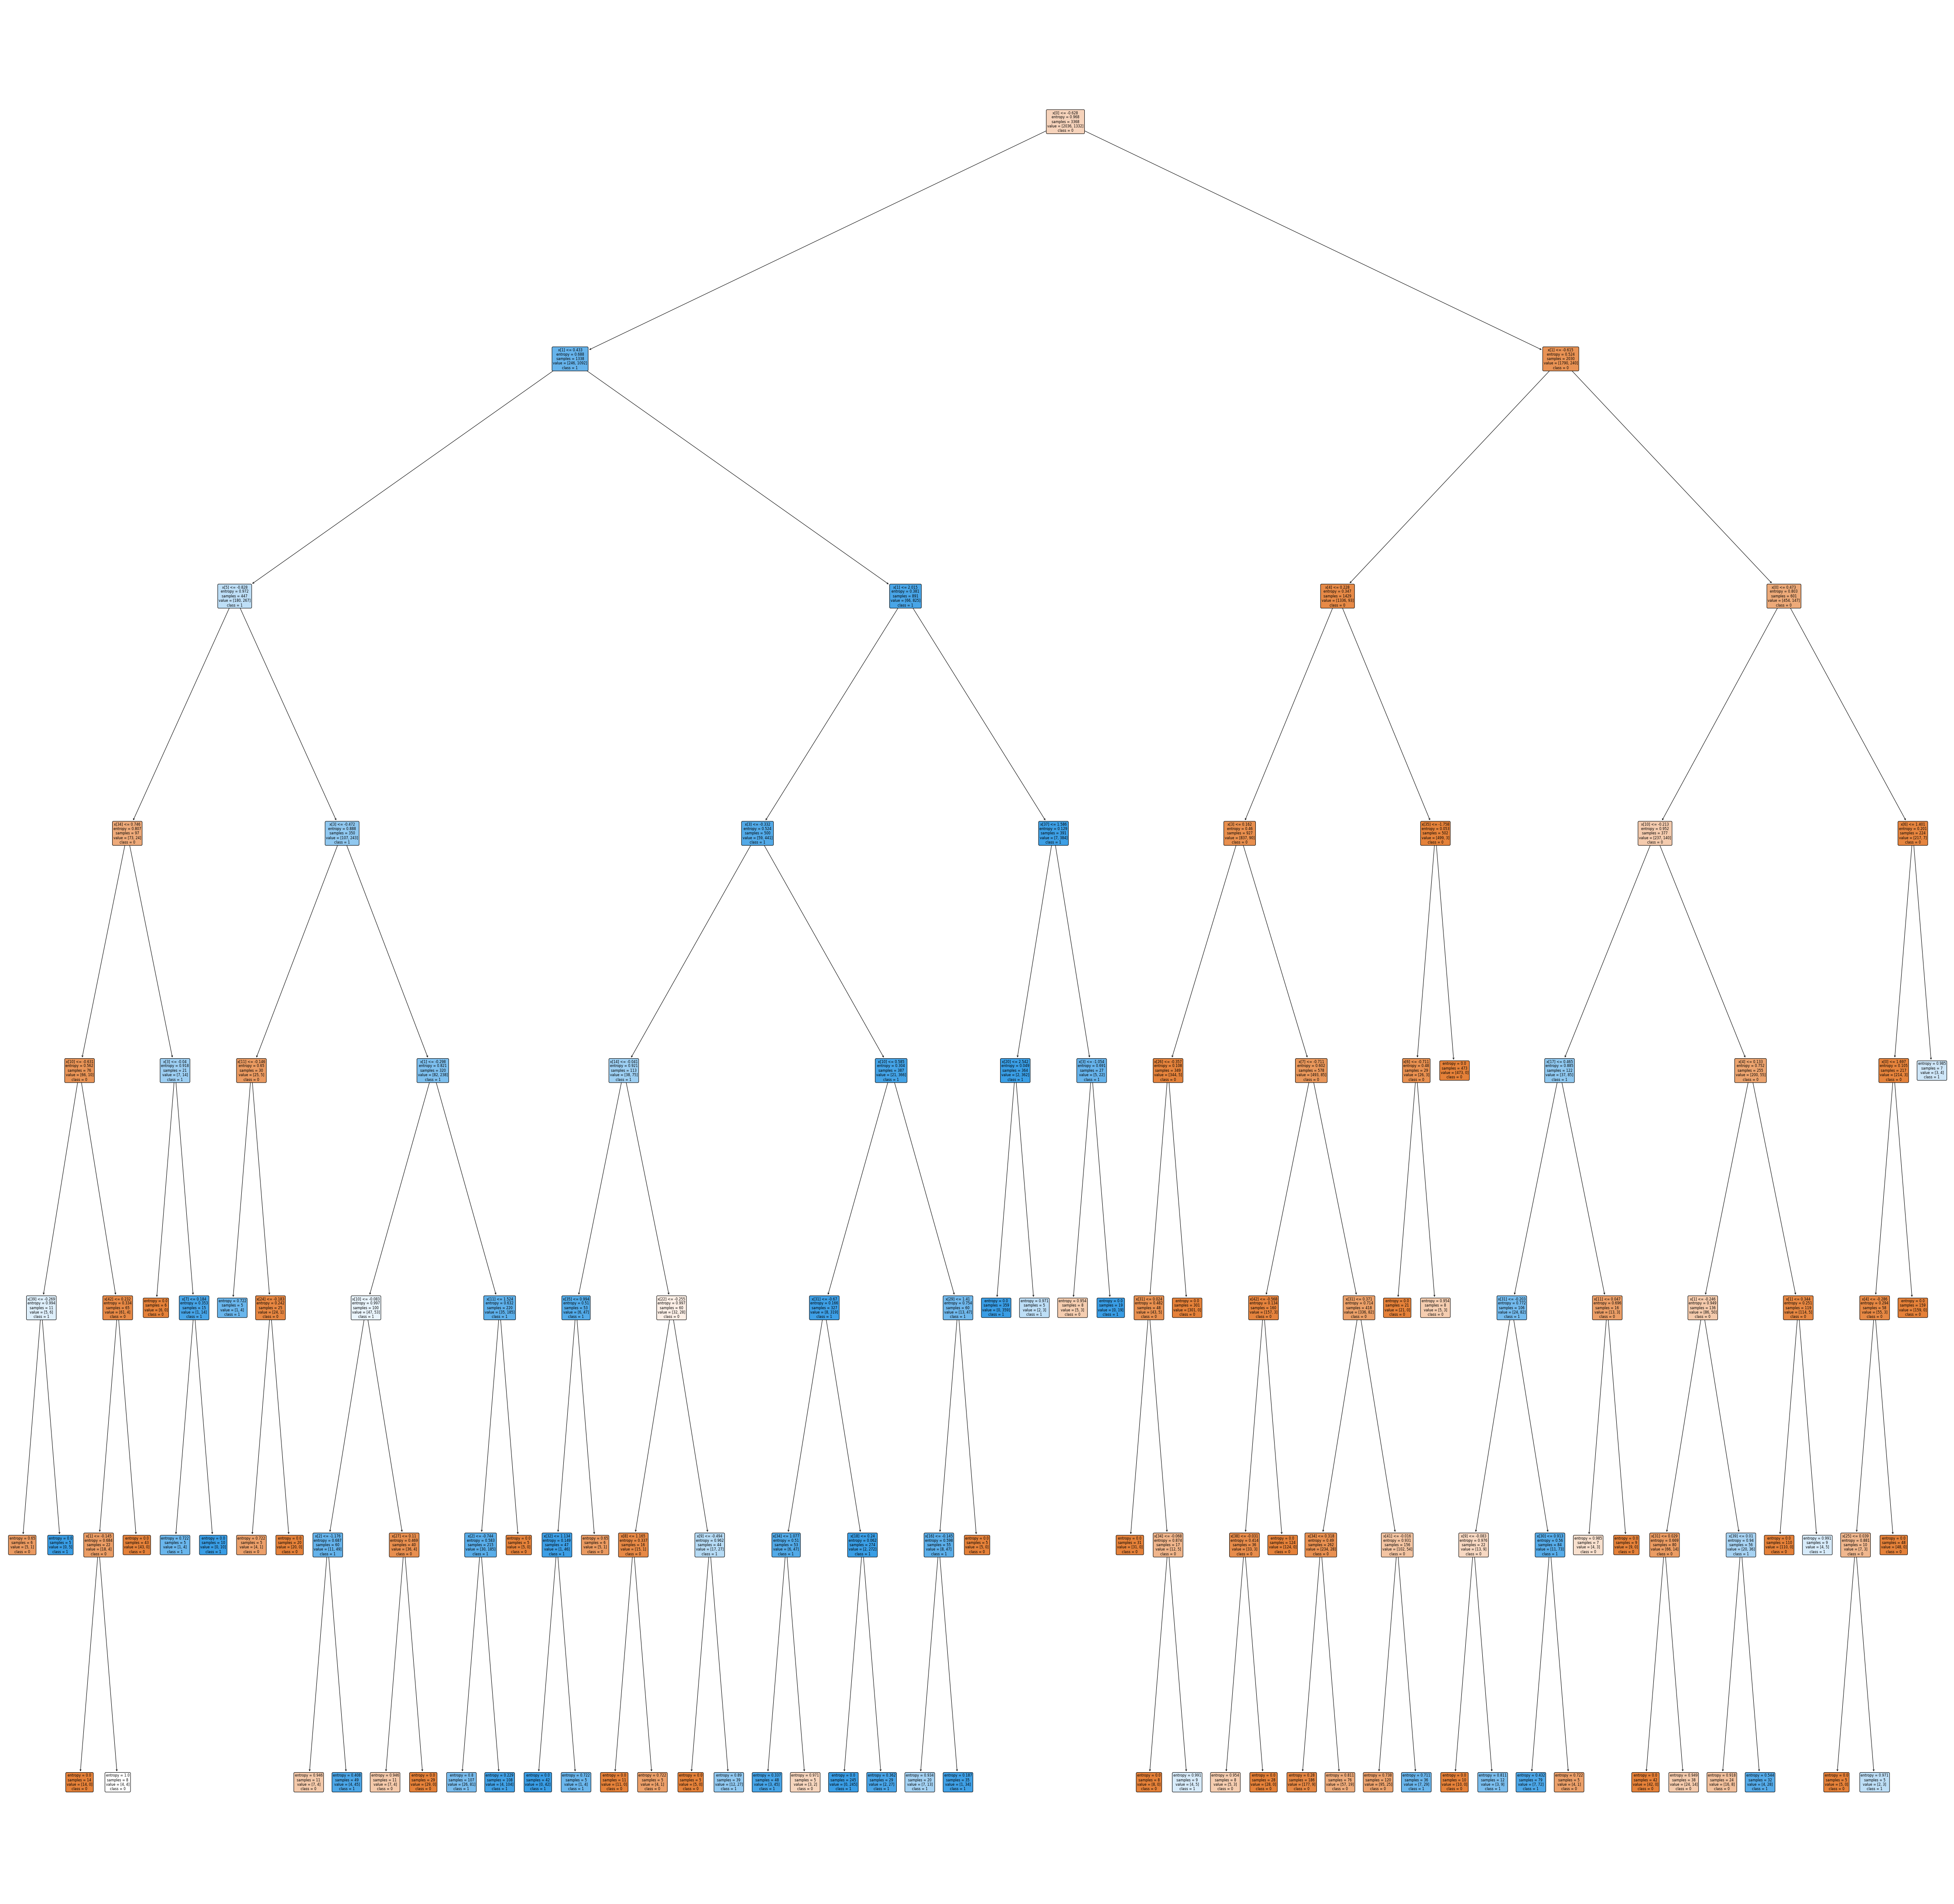

In [135]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,80))
plot_tree(model, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


Model Evaluation

In [136]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[0.89292929 0.10707071]
 [0.12391931 0.87608069]]


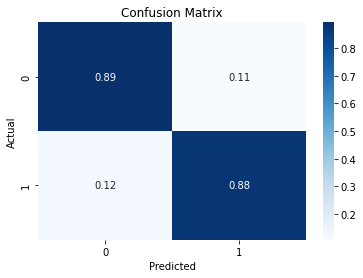

In [137]:
#Visualization of the confusion matrix 
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [138]:
#Checking the f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score:",f1)

f1 score: 0.8636363636363638


In [139]:
#Checking the Accuracy
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print("Accuracy score:",ac)

Accuracy score: 0.8859857482185273


In [140]:
#Precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision score:", precision)

Precision score: 0.8515406162464986


In [141]:
#Recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

Recall Score: 0.8760806916426513


In [142]:
#classification report
from sklearn.metrics import classification_report
class_rep = classification_report(y_test,y_pred)
print("Classification Report:\n",class_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       495
           1       0.85      0.88      0.86       347

    accuracy                           0.89       842
   macro avg       0.88      0.88      0.88       842
weighted avg       0.89      0.89      0.89       842

